In [138]:
import numpy as np
import os,sys,glob,pdb,pickle
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import math




def readfile(filename):
    output = pd.read_csv(filename, sep=',')
    return output

dfile = 'GDR2_TAUAUR_cleaned.csv'
data = readfile(dfile)
print(len(data))


def func(phot_bp_mean_mag, phot_rp_mean_mag, abs_mag_g_data):
    dfile = 'GDR2_TAUAUR_cleaned.csv'
    data = readfile(dfile)
    plt.scatter(data.phot_bp_mean_mag.values-data.phot_rp_mean_mag.values,abs_mag_g, alpha=1, label='Unfiltered', marker='o', s=0.1, c='g')
    plt.scatter(data_2.phot_bp_mean_mag.values-data_2.phot_rp_mean_mag.values,abs_mag_g_2, alpha=0.6, label='g > 50, bp & rp > 20', marker='o', s=0.1, c='b')
    plt.scatter(data_3.phot_bp_mean_mag.values-data_3.phot_rp_mean_mag.values,abs_mag_g_3 , alpha=1, label='Visibility Period < 8', marker='o', s=0.1, c='r')
    #plt.plot(data_4.phot_bp_mean_mag.values-data_4.phot_rp_mean_mag.values,abs_mag_g_4 , ',k', alpha=0.5)
    HRD_5 = plt.scatter(data_5.phot_bp_mean_mag.values-data_5.phot_rp_mean_mag.values,abs_mag_g_5 , alpha=0.6, label='g > 75, bp & rp > 50', marker='o', s=0.1, c='y')
    plt.ylim([16,-2.5])
    plt.xlim([-.5,4.5])
    plt.suptitle('Hertzsprung Russell Diagram 2')
    plt.xlabel('B-R')
    plt.ylabel('Absolute Magnitude')
    plt.legend(markerscale=9., scatterpoints=1, fontsize=10)
    return
print(len(data))


43043
43043


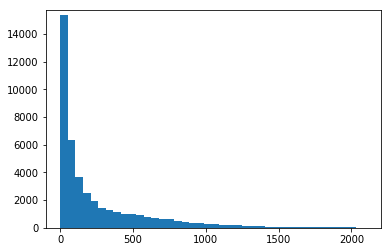

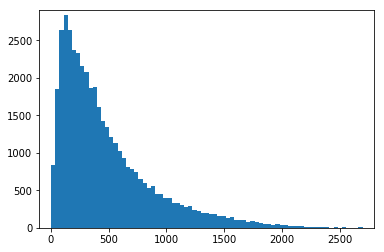

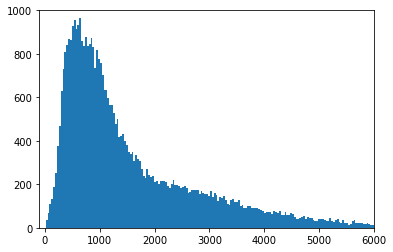

In [3]:
phot_bp_mean_flux_error = data.phot_bp_mean_flux.values *( 1/(data.phot_bp_mean_flux_over_error.values))
phot_rp_mean_flux_error = data.phot_rp_mean_flux.values *( 1/(data.phot_rp_mean_flux_over_error.values))
phot_g_mean_flux_error = data.phot_g_mean_flux.values *( 1/(data.phot_g_mean_flux_over_error.values))

plt.hist(data.phot_bp_mean_flux_over_error.values,bins=300)
plt.xlim(-100,2200)
plt.ylim(0,15700)
plt.show()

plt.hist(data.phot_rp_mean_flux_over_error.values,bins=300)
plt.xlim(-100,2800)
plt.ylim(0,2900)
plt.show()

plt.hist(data.phot_g_mean_flux_over_error.values,bins=300)
plt.xlim(-100,6000)
plt.ylim(0,1000)
plt.show()

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


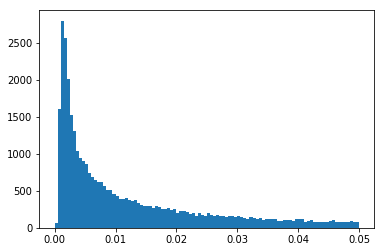

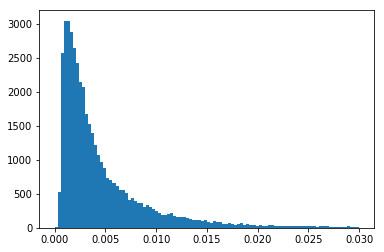

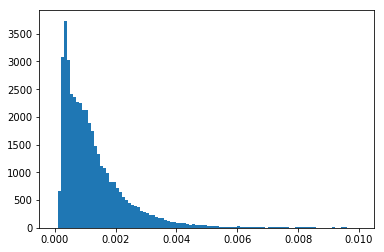

In [4]:
mag_bp_error = np.abs(-2.5*(phot_bp_mean_flux_error/(data.phot_bp_mean_flux.values*math.log(10))))
print(type(mag_bp_error))
mag_rp_error = np.abs(-2.5*(phot_rp_mean_flux_error/(data.phot_rp_mean_flux.values*math.log(10))))
print(type(mag_rp_error))
mag_g_error = np.abs(-2.5*(phot_g_mean_flux_error/(data.phot_g_mean_flux.values*math.log(10))))
print(type(mag_g_error))

plt.hist(mag_bp_error, range=[0,0.05], bins=100)
plt.show()

plt.hist(mag_rp_error, range=[0,0.03], bins=100)
plt.show()

plt.hist(mag_g_error, range=[0,0.01], bins=100)
plt.show()

In [5]:
abs_mag_g = data.phot_g_mean_mag.values+5-5*np.log10(1000.0/data.parallax.values)
print(type(abs_mag_g))

print(np.shape(data.parallax_error.values))
print(type(data.parallax_error.values))
print(np.shape(data.parallax.values))
print(type(data.parallax.values))


parallax_error_np_array= np.array([data.parallax_error.values])
parallax_np_array = np.array([data.parallax.values])
mag_g_error_np_array= np.array([mag_g_error])

abs_mag_g_error = np.sqrt((mag_g_error_np_array)**2 + np.abs(5*(parallax_error_np_array/parallax_np_array)/(math.log(10)))**2)

<class 'numpy.ndarray'>
(43043,)
<class 'numpy.ndarray'>
(43043,)
<class 'numpy.ndarray'>


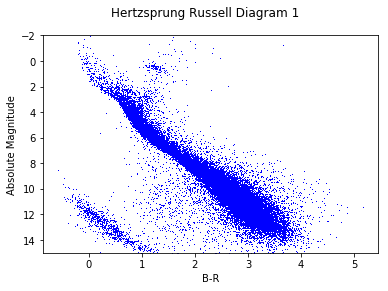

In [6]:
plt.plot(data.phot_bp_mean_mag.values-data.phot_rp_mean_mag.values,abs_mag_g ,',b')
plt.ylim([15,-2])
plt.suptitle('Hertzsprung Russell Diagram 1')
plt.xlabel('B-R')
plt.ylabel('Absolute Magnitude')
plt.savefig('HRD_Unfiltered.pdf')
plt.show()

In [82]:
keep_1 = np.where((data.phot_g_mean_flux_over_error > 50)  &  
    (data.phot_bp_mean_flux_over_error > 20) & (data.phot_rp_mean_flux_over_error > 20))[0]
keep_2 = np.where((data.phot_g_mean_flux_over_error > 50)  & (data.phot_bp_mean_flux_over_error > 20) & (data.phot_rp_mean_flux_over_error > 20) & ((data.visibility_periods_used > 8)))[0]
keep_3 = np.where((data.visibility_periods_used < 8))[0]
keep_4 = np.where((data.phot_g_mean_flux_over_error > 75)  &  (data.phot_bp_mean_flux_over_error > 50) & (data.phot_rp_mean_flux_over_error > 50))[0]
print(len(keep_1))
print(len(keep_2))
print(len(keep_3))
print(len(keep_4))


35648
34295
362
27957


In [84]:
data_2 = data.iloc[keep_1]
data_3 = data.iloc[keep_2]
data_4 = data.iloc[keep_3]
data_5 = data.iloc[keep_4]

print(len(data_2.phot_bp_mean_mag.values))
print(len(data.phot_bp_mean_mag.values))
print(len(data_3))

35648
43043
34295


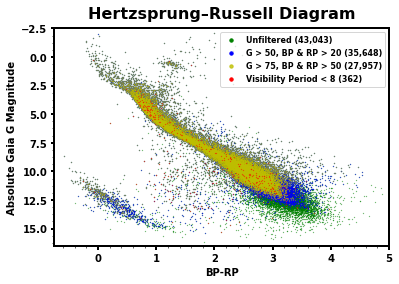

In [180]:
abs_mag_g_2 = data_2.phot_g_mean_mag.values+5-5*np.log10(1000.0/data_2.parallax.values)
abs_mag_g_3 = data_3.phot_g_mean_mag.values+5-5*np.log10(1000.0/data_3.parallax.values)
abs_mag_g_4 = data_4.phot_g_mean_mag.values+5-5*np.log10(1000.0/data_4.parallax.values)
abs_mag_g_5 = data_5.phot_g_mean_mag.values+5-5*np.log10(1000.0/data_5.parallax.values)

plt.scatter(data.phot_bp_mean_mag.values-data.phot_rp_mean_mag.values,abs_mag_g, alpha=1, label='Unfiltered (43,043)', marker='o', s=0.05, c='g')
plt.scatter(data_2.phot_bp_mean_mag.values-data_2.phot_rp_mean_mag.values,abs_mag_g_2, alpha=1, label='G > 50, BP & RP > 20 (35,648)', marker='o', s=0.05, c='b')
#plt.scatter(data_3.phot_bp_mean_mag.values-data_3.phot_rp_mean_mag.values,abs_mag_g_3 , alpha=1, label='Visibility Periods > 8, G > 50, BP & RP > 20', marker='o', s=0.05, c='r')

plt.scatter(data_5.phot_bp_mean_mag.values-data_5.phot_rp_mean_mag.values,abs_mag_g_5 , alpha=0.8, label='G > 75, BP & RP > 50 (27,957)', marker='o', s=0.05, c='y')
plt.scatter(data_4.phot_bp_mean_mag.values-data_4.phot_rp_mean_mag.values,abs_mag_g_4 , label = 'Visibility Period < 8 (362)', alpha=1, marker='o', c='r', s=0.05)
plt.ylim([16.5,-2.5])
plt.xlim([-.75,5])
plt.title('Hertzsprung–Russell Diagram', fontsize=16, fontweight='bold')
plt.xlabel('BP-RP')
plt.ylabel('Absolute Gaia G Magnitude')
plt.legend(markerscale=15., scatterpoints=1, fontsize=8, loc = 'upper right')
plt.savefig('HRD_Filter_Choices.pdf')

from matplotlib import rcParams
rcParams['axes.titlepad'] = 10 
mpl.rcParams['lines.linewidth']   = 1
mpl.rcParams['axes.linewidth']    = 2
mpl.rcParams['xtick.major.width'] = 2

mpl.rcParams['ytick.major.width'] = 2

mpl.rcParams['ytick.labelsize'] = 10
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['axes.labelsize'] = 10
mpl.rcParams['legend.numpoints'] = 1
mpl.rcParams['axes.labelweight']='bold'
mpl.rcParams['axes.titlesize']=18
mpl.rcParams['axes.titleweight']='semibold'
mpl.rcParams['font.weight'] = 'bold'

plt.minorticks_on()
plt.savefig('HRD_Filter_Choices.png')

plt.show()







In [ ]:
    T_Tau = np.where(data.source_id.values == 48192969034959232)

<function matplotlib.pyplot.show(*args, **kw)>

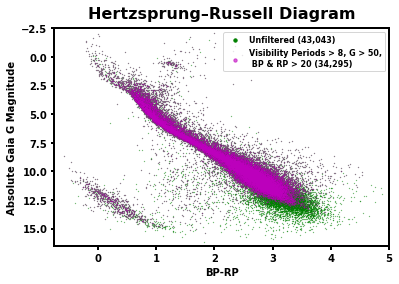

In [181]:


plt.scatter(data.phot_bp_mean_mag.values-data.phot_rp_mean_mag.values,abs_mag_g, alpha=1, label='Unfiltered (43,043)', marker='o', s=0.05, c='g')
plt.scatter(data_3.phot_bp_mean_mag.values-data_3.phot_rp_mean_mag.values,abs_mag_g_3 , alpha=0.6, label='Visibility Periods > 8, G > 50,\n BP & RP > 20 (34,295)', marker='o', s=0.05, c='m')
plt.ylim([16.5,-2.5])
plt.xlim([-.75,5])
plt.title('Hertzsprung–Russell Diagram', fontsize=16, fontweight='bold')
plt.xlabel('BP-RP')
plt.ylabel('Absolute Gaia G Magnitude')
plt.legend(markerscale=15., scatterpoints=1, fontsize=8)

from matplotlib import rcParams
rcParams['axes.titlepad'] = 10 
mpl.rcParams['lines.linewidth']   = 1
mpl.rcParams['axes.linewidth']    = 2
mpl.rcParams['xtick.major.width'] = 2

mpl.rcParams['ytick.major.width'] = 2

mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['axes.labelsize'] = 13
mpl.rcParams['legend.numpoints'] = 5
mpl.rcParams['axes.labelweight']='bold'
mpl.rcParams['axes.titlesize']=20
mpl.rcParams['axes.titleweight']='semibold'
mpl.rcParams['font.weight'] = 'bold'
plt.savefig('HRD_Filter_Final.png')
plt.show